# Genetic Algorithm for Solving the Travelling Salesman Problem (TSP)

### Overview
This repository contains Python scripts and a Jupyter notebook for solving the Travelling Salesman Problem (TSP) using Genetic Algorithms (GA). The implementation includes different selection strategies (Tournament vs. Roulette Selection) and crossover methods (Ordered Crossover (OX1) vs. Partially Mapped Crossover (PMX)) to evaluate their effectiveness in finding optimal solutions.

### Files in the Repository
- `TSM_performance_testing.ipynb` – Jupyter Notebook for testing and visualising different GA configurations.

- `TSM_supporting_codes.py` – Python script containing function definitions for the Genetic Algorithm.

- `TSM_tournament.py` – GA implementation using Tournament Selection with Ordered Crossover (OX1).

- `TSM_tournament_pmx.py` – GA implementation using Tournament Selection with Partially Mapped Crossover (PMX).

- `TSM_roulette.py` – GA implementation using Roulette Selection with Ordered Crossover (OX1).

- `TSM_roulette_pmx.py` – GA implementation using Roulette Selection with Partially Mapped Crossover (PMX).

<br> <!-- Adds a single line break -->

#### Requirements

The following dependencies are required to run the scripts:

```
pip install numpy matplotlib
```

<br> <!-- Adds a single line break -->

### How to Use the Jupyter Notebook

1. Open `TSM_performance_testing.ipynb`.

2. Run all cells step-by-step to generate cities, optimise the TSP using GA, and visualise the results.

3. Modify the hyperparameters (population size, mutation rate, crossover rate) to observe different outcomes.

<br> <!-- Adds a single line break -->

#### Customising the Parameters

The Genetic Algorithm allows the following parameters to be adjusted:

- Population Size: The number of individuals in each generation.

- Mutation Rate: The probability of a mutation occurring in offspring.

- Crossover Rate: The probability of crossover between parents.

- Number of Generations: The total number of iterations for evolution.

To fine-tune these parameters, modify them directly in the scripts:
```
best_route, best_distance, history = genetic_algorithm_tsp(
    cities, population_size=200, generations=500, mutation_rate=0.1
)
```

<br> <!-- Adds a single line break -->

#### Visualizsing Results

1. Best TSP Route: Plots the optimal route found by the GA.

2. Convergence Plot: Displays the best distance over generations to assess convergence speed and effectiveness.

<br> <!-- Adds a single line break -->

### Future Enhancements

- Implementing hybrid optimisation techniques (e.g., Local Search, Simulated Annealing).

- Improving scalability for larger TSP instances.

- Parallelising computations for faster execution.

<br> <!-- Adds a single line break -->

### License

This project is open-source and free to use for research and educational purposes.

### `TSM_tournament.py`


--- Testing: Population=50, Mutation=0.05, Crossover=0.6 ---
Generation 0: Best Distance = 883.89
Generation 50: Best Distance = 477.25

Stopping early at generation 94 due to convergence (no improvement for 50 generations).


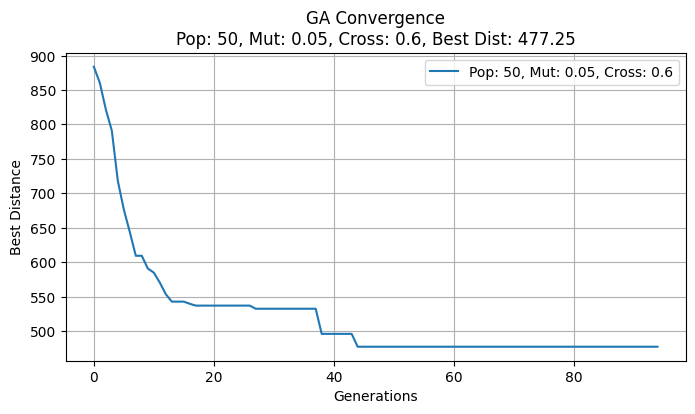


--- Testing: Population=50, Mutation=0.05, Crossover=0.8 ---
Generation 0: Best Distance = 824.27
Generation 50: Best Distance = 623.93

Stopping early at generation 61 due to convergence (no improvement for 50 generations).


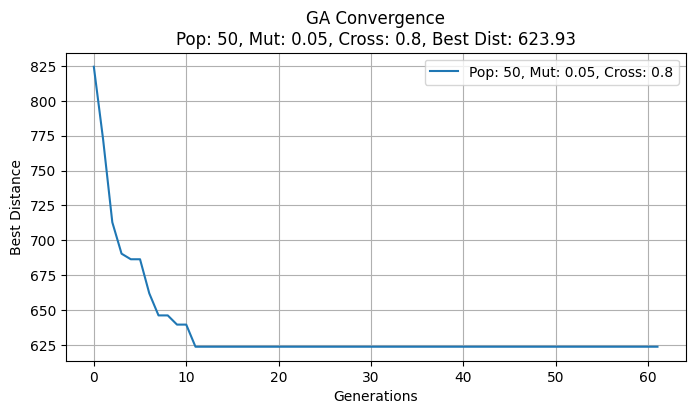


--- Testing: Population=50, Mutation=0.05, Crossover=0.9 ---
Generation 0: Best Distance = 861.29
Generation 50: Best Distance = 538.57
Generation 100: Best Distance = 528.48
Generation 150: Best Distance = 524.50

Stopping early at generation 194 due to convergence (no improvement for 50 generations).


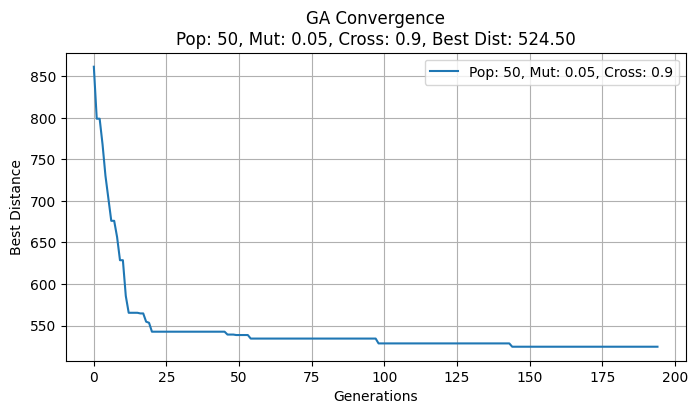


--- Testing: Population=50, Mutation=0.1, Crossover=0.6 ---
Generation 0: Best Distance = 876.71
Generation 50: Best Distance = 506.03


KeyboardInterrupt: 

In [2]:
"""
- TSM with Tournament selection
- swap mutation
- ordered crossover
"""

# 1. Imports

import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
from TSM_supporting_codes import (
                                tune_parameters,
                                create_initial_population,
                                tournament_selection,
                                ordered_crossover,
                                swap_mutation,
                                total_distance,
                                cities
                                )

param_grid = {
    "population_size": [50, 100, 200],  # Different population sizes
    "mutation_rate": [0.05, 0.1, 0.2],  # Different mutation rates
    "crossover_rate": [0.6, 0.8, 0.9]   # Different crossover probabilities
}

import matplotlib.pyplot as plt
import numpy as np


def genetic_algorithm_tsp(cities, population_size=100, generations=500, mutation_rate=0.1, crossover_rate=0.8,
                          stagnation_limit=50):
    """Genetic Algorithm for TSP with early stopping when convergence is reached."""

    population = create_initial_population(cities, population_size)
    best_solution = None
    best_distance = float("inf")
    history = []

    stagnation_counter = 0  # Counts generations with no improvement

    for gen in range(generations):
        new_population = []

        for _ in range(population_size // 2):
            parent1 = tournament_selection(population, cities)
            parent2 = tournament_selection(population, cities)

            # Apply crossover based on crossover_rate
            if random.random() < crossover_rate:
                child1 = ordered_crossover(parent1, parent2)
                child2 = ordered_crossover(parent2, parent1)
            else:
                child1, child2 = parent1[:], parent2[:]  # No crossover, copy parents

            # Apply mutation
            child1 = swap_mutation(child1, mutation_rate)
            child2 = swap_mutation(child2, mutation_rate)

            new_population.extend([child1, child2])

        population = new_population
        current_best = min(population, key=lambda x: total_distance(x, cities))
        current_best_distance = total_distance(current_best, cities)

        if current_best_distance < best_distance:
            best_solution = current_best
            best_distance = current_best_distance
            stagnation_counter = 0  # Reset stagnation counter since improvement occurred
        else:
            stagnation_counter += 1  # Increment stagnation counter

        history.append(best_distance)

        # Print update every 50 generations
        if gen % 50 == 0:
            print(f"Generation {gen}: Best Distance = {best_distance:.2f}")

        # **Early stopping condition** if no improvement for `stagnation_limit` generations
        if stagnation_counter >= stagnation_limit:
            print(
                f"\nStopping early at generation {gen} due to convergence (no improvement for {stagnation_limit} generations).")
            break  # Exit loop early

    return best_solution, best_distance, history



def plot_convergence(history, population_size, mutation_rate, crossover_rate, best_distance):
    """Plots the convergence of the GA and includes parameters in the title for easy comparison."""
    plt.figure(figsize=(8, 4))
    plt.plot(history, label=f"Pop: {population_size}, Mut: {mutation_rate}, Cross: {crossover_rate}")

    plt.xlabel("Generations")
    plt.ylabel("Best Distance")
    plt.title(
        f"GA Convergence\nPop: {population_size}, Mut: {mutation_rate}, Cross: {crossover_rate}, Best Dist: {best_distance:.2f}")
    plt.legend()
    plt.grid()
    plt.show()


def plot_route(route, cities, population_size, mutation_rate, crossover_rate, best_distance):
    """Plots the best TSP route and includes parameters in the title."""
    plt.figure(figsize=(8, 6))
    ordered_cities = np.array([cities[i] for i in route] + [cities[route[0]]])  # Close the loop
    plt.plot(ordered_cities[:, 0], ordered_cities[:, 1], 'o-', label="Route")

    for i, city in enumerate(cities):
        plt.text(city[0], city[1], str(i), fontsize=12, ha="right")

    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title(
        f"Best TSP Route\nPop: {population_size}, Mut: {mutation_rate}, Cross: {crossover_rate}, Best Dist: {best_distance:.2f}")
    plt.legend()
    plt.grid()
    plt.show()



def tune_parameters(cities, param_grid, generations=500, stagnation_limit=50):
    best_params = None
    best_distance = float("inf")
    best_history = []
    best_route = None

    # Iterate over all parameter combinations
    for pop_size in param_grid["population_size"]:
        for mutation_rate in param_grid["mutation_rate"]:
            for crossover_rate in param_grid["crossover_rate"]:

                # Print test configuration **before** running GA, with flush=True
                print(f"\n--- Testing: Population={pop_size}, Mutation={mutation_rate}, Crossover={crossover_rate} ---",
                      flush=True)

                # Run the GA with early stopping
                best_route_run, distance, history = genetic_algorithm_tsp(
                    cities, population_size=pop_size, generations=generations,
                    mutation_rate=mutation_rate, crossover_rate=crossover_rate, stagnation_limit=stagnation_limit
                )

                # Plot convergence for this run
                plot_convergence(history, pop_size, mutation_rate, crossover_rate, distance)

                # Update best parameters if a better solution is found
                if distance < best_distance:
                    best_distance = distance
                    best_params = {
                        "population_size": pop_size,
                        "mutation_rate": mutation_rate,
                        "crossover_rate": crossover_rate
                    }
                    best_history = history
                    best_route = best_route_run

    return best_params, best_distance, best_route, best_history



# Run parameter tuning
best_params, best_distance, best_route, best_history = tune_parameters(cities, param_grid, stagnation_limit=50)

# Print the best performing hyperparameters
print(f"\nBest Parameters Found: {best_params}")
print(f"Best Distance Achieved: {best_distance:.2f}")

# Plot the best route found
plot_route(best_route, cities, best_params["population_size"], best_params["mutation_rate"], best_params["crossover_rate"], best_distance)



### `TSM_tournament_pmx.py`


--- Testing: Population=50, Mutation=0.05, Crossover=0.6 ---
Generation 0: Best Distance = 852.48
Generation 50: Best Distance = 523.71
Generation 100: Best Distance = 523.52

Stopping early at generation 107 due to convergence (no improvement for 50 generations).


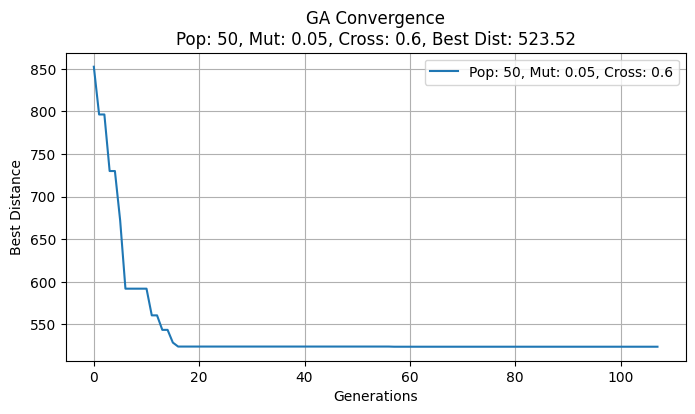


--- Testing: Population=50, Mutation=0.05, Crossover=0.8 ---
Generation 0: Best Distance = 869.98
Generation 50: Best Distance = 506.18


KeyboardInterrupt: 

In [3]:
"""
- TSM with Tournament selection
- swap mutation
- Partially Mapped Crossover (PMX)
"""

# 1. Imports
import matplotlib.pyplot as plt
import numpy as np
import random
from TSM_supporting_codes import (
    create_initial_population,
    tournament_selection,
    swap_mutation,
    total_distance,
    cities, pmx_crossover
)
from TSM_tournament import (tune_parameters,
                            plot_route,
                            plot_convergence,
                            param_grid
                            )



def genetic_algorithm_tsp(cities, population_size=100, generations=500, mutation_rate=0.1, crossover_rate=0.8,
                          stagnation_limit=50):
    """Genetic Algorithm for TSP with early stopping when convergence is reached."""

    population = create_initial_population(cities, population_size)
    best_solution = None
    best_distance = float("inf")
    history = []

    stagnation_counter = 0  # Counts generations with no improvement

    for gen in range(generations):
        new_population = []

        for _ in range(population_size // 2):
            parent1 = tournament_selection(population, cities)
            parent2 = tournament_selection(population, cities)

            # Apply crossover based on Partially Mapped Crossover (PMX)
            if random.random() < crossover_rate:
                child1 = pmx_crossover(parent1, parent2)
                child2 = pmx_crossover(parent2, parent1)
            else:
                child1, child2 = parent1[:], parent2[:]  # No crossover, copy parents

            # Apply mutation
            child1 = swap_mutation(child1, mutation_rate)
            child2 = swap_mutation(child2, mutation_rate)

            new_population.extend([child1, child2])

        population = new_population
        current_best = min(population, key=lambda x: total_distance(x, cities))
        current_best_distance = total_distance(current_best, cities)

        if current_best_distance < best_distance:
            best_solution = current_best
            best_distance = current_best_distance
            stagnation_counter = 0  # Reset stagnation counter since improvement occurred
        else:
            stagnation_counter += 1  # Increment stagnation counter

        history.append(best_distance)

        # Print update every 50 generations
        if gen % 50 == 0:
            print(f"Generation {gen}: Best Distance = {best_distance:.2f}")

        # **Early stopping condition** if no improvement for `stagnation_limit` generations
        if stagnation_counter >= stagnation_limit:
            print(
                f"\nStopping early at generation {gen} due to convergence (no improvement for {stagnation_limit} generations).")
            break  # Exit loop early

    return best_solution, best_distance, history




# Run parameter tuning
best_params, best_distance, best_route, best_history = tune_parameters(cities, param_grid)

# Print the best performing hyperparameters
print(f"\nBest Parameters Found: {best_params}")
print(f"Best Distance Achieved: {best_distance:.2f}")

# Plot the best route found
plot_route(best_route, cities, best_params["population_size"], best_params["mutation_rate"], best_params["crossover_rate"], best_distance)



### `TSM_roulette.py`

In [4]:
"""
- TSM with Roulette selection
- swap mutation
- ordered crossover
"""


# 1. Imports

import numpy as np
import matplotlib.pyplot as plt
import random
from TSM_supporting_codes import (create_initial_population,
                                roulette_wheel_selection,
                                ordered_crossover,
                                swap_mutation,
                                total_distance,
                                cities
                                )

param_grid = {
    "population_size": [50, 100, 200],  # Different population sizes
    "mutation_rate": [0.05, 0.1, 0.2],  # Different mutation rates
    "crossover_rate": [0.6, 0.8, 0.9]   # Different crossover probabilities
}



def genetic_algorithm_tsp(cities, population_size=100, generations=500, mutation_rate=0.1, crossover_rate=0.8,
                          stagnation_limit=50):
    """Genetic Algorithm for TSP with early stopping when convergence is reached."""

    population = create_initial_population(cities, population_size)
    best_solution = None
    best_distance = float("inf")
    history = []

    stagnation_counter = 0  # Counts generations with no improvement

    for gen in range(generations):
        new_population = []

        for _ in range(population_size // 2):
            parent1 = roulette_wheel_selection(population, cities)
            parent2 = roulette_wheel_selection(population, cities)

            # Apply crossover based on crossover_rate
            if random.random() < crossover_rate:
                child1 = ordered_crossover(parent1, parent2)
                child2 = ordered_crossover(parent2, parent1)
            else:
                child1, child2 = parent1[:], parent2[:]  # No crossover, copy parents

            # Apply mutation
            child1 = swap_mutation(child1, mutation_rate)
            child2 = swap_mutation(child2, mutation_rate)

            new_population.extend([child1, child2])

        population = new_population
        current_best = min(population, key=lambda x: total_distance(x, cities))
        current_best_distance = total_distance(current_best, cities)

        if current_best_distance < best_distance:
            best_solution = current_best
            best_distance = current_best_distance
            stagnation_counter = 0  # Reset stagnation counter since improvement occurred
        else:
            stagnation_counter += 1  # Increment stagnation counter

        history.append(best_distance)

        # Print update every 50 generations
        if gen % 50 == 0:
            print(f"Generation {gen}: Best Distance = {best_distance:.2f}")

        # **Early stopping condition** if no improvement for `stagnation_limit` generations
        if stagnation_counter >= stagnation_limit:
            print(
                f"\nStopping early at generation {gen} due to convergence (no improvement for {stagnation_limit} generations).")
            break  # Exit loop early

    return best_solution, best_distance, history



def plot_convergence(history, population_size, mutation_rate, crossover_rate, best_distance):
    """Plots the convergence of the GA and includes parameters in the title for easy comparison."""
    plt.figure(figsize=(8, 4))
    plt.plot(history, label=f"Pop: {population_size}, Mut: {mutation_rate}, Cross: {crossover_rate}")

    plt.xlabel("Generations")
    plt.ylabel("Best Distance")
    plt.title(
        f"GA Convergence\nPop: {population_size}, Mut: {mutation_rate}, Cross: {crossover_rate}, Best Dist: {best_distance:.2f}")
    plt.legend()
    plt.grid()
    plt.show()


def plot_route(route, cities, population_size, mutation_rate, crossover_rate, best_distance):
    """Plots the best TSP route and includes parameters in the title."""
    plt.figure(figsize=(8, 6))
    ordered_cities = np.array([cities[i] for i in route] + [cities[route[0]]])  # Close the loop
    plt.plot(ordered_cities[:, 0], ordered_cities[:, 1], 'o-', label="Route")

    for i, city in enumerate(cities):
        plt.text(city[0], city[1], str(i), fontsize=12, ha="right")

    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title(
        f"Best TSP Route\nPop: {population_size}, Mut: {mutation_rate}, Cross: {crossover_rate}, Best Dist: {best_distance:.2f}")
    plt.legend()
    plt.grid()
    plt.show()


def tune_parameters(cities, param_grid, generations=500, stagnation_limit=50):
    best_params = None
    best_distance = float("inf")
    best_history = []
    best_route = None

    # Iterate over all parameter combinations
    for pop_size in param_grid["population_size"]:
        for mutation_rate in param_grid["mutation_rate"]:
            for crossover_rate in param_grid["crossover_rate"]:

                # Print test configuration **before** running GA, with flush=True
                print(f"\n--- Testing: Population={pop_size}, Mutation={mutation_rate}, Crossover={crossover_rate} ---",
                      flush=True)

                # Run the GA with early stopping
                best_route_run, distance, history = genetic_algorithm_tsp(
                    cities, population_size=pop_size, generations=generations,
                    mutation_rate=mutation_rate, crossover_rate=crossover_rate, stagnation_limit=stagnation_limit
                )

                # Plot convergence for this run
                plot_convergence(history, pop_size, mutation_rate, crossover_rate, distance)

                # Update best parameters if a better solution is found
                if distance < best_distance:
                    best_distance = distance
                    best_params = {
                        "population_size": pop_size,
                        "mutation_rate": mutation_rate,
                        "crossover_rate": crossover_rate
                    }
                    best_history = history
                    best_route = best_route_run

    return best_params, best_distance, best_route, best_history



# Run parameter tuning
best_params, best_distance, best_route, best_history = tune_parameters(cities, param_grid, stagnation_limit=50)

# Print the best performing hyperparameters
print(f"\nBest Parameters Found: {best_params}")
print(f"Best Distance Achieved: {best_distance:.2f}")

# Plot the best route found
plot_route(best_route, cities, best_params["population_size"], best_params["mutation_rate"], best_params["crossover_rate"], best_distance)




--- Testing: Population=50, Mutation=0.05, Crossover=0.6 ---
Generation 0: Best Distance = 915.05


KeyboardInterrupt: 

### `TSM_roulette_pmx.py`

In [ ]:
"""
-TSM with Roulette selection
- swap mutation
- Partially Mapped Crossover (PMX)
"""


# 1. Imports

import numpy as np
import matplotlib.pyplot as plt
import random
from TSM_supporting_codes import (create_initial_population,
                                  roulette_wheel_selection,
                                  swap_mutation,
                                  total_distance,
                                  cities,
                                  pmx_crossover
                                  )

from TSM_roulette import plot_convergence, plot_route, tune_parameters, param_grid



def genetic_algorithm_tsp(cities, population_size=100, generations=500, mutation_rate=0.1, crossover_rate=0.8,
                          stagnation_limit=50):
    """Genetic Algorithm for TSP with early stopping when convergence is reached."""

    population = create_initial_population(cities, population_size)
    best_solution = None
    best_distance = float("inf")
    history = []

    stagnation_counter = 0  # Counts generations with no improvement

    for gen in range(generations):
        new_population = []

        for _ in range(population_size // 2):
            parent1 = roulette_wheel_selection(population, cities)
            parent2 = roulette_wheel_selection(population, cities)

            # # Apply crossover based on Partially Mapped Crossover (PMX)
            if random.random() < crossover_rate:
                child1 = pmx_crossover(parent1, parent2)
                child2 = pmx_crossover(parent2, parent1)
            else:
                child1, child2 = parent1[:], parent2[:]  # No crossover, copy parents

            # Apply mutation
            child1 = swap_mutation(child1, mutation_rate)
            child2 = swap_mutation(child2, mutation_rate)

            new_population.extend([child1, child2])

        population = new_population
        current_best = min(population, key=lambda x: total_distance(x, cities))
        current_best_distance = total_distance(current_best, cities)

        if current_best_distance < best_distance:
            best_solution = current_best
            best_distance = current_best_distance
            stagnation_counter = 0  # Reset stagnation counter since improvement occurred
        else:
            stagnation_counter += 1  # Increment stagnation counter

        history.append(best_distance)

        # Print update every 50 generations
        if gen % 50 == 0:
            print(f"Generation {gen}: Best Distance = {best_distance:.2f}")

        # **Early stopping condition** if no improvement for `stagnation_limit` generations
        if stagnation_counter >= stagnation_limit:
            print(
                f"\nStopping early at generation {gen} due to convergence (no improvement for {stagnation_limit} generations).")
            break  # Exit loop early

    return best_solution, best_distance, history



# Run parameter tuning
best_params, best_distance, best_route, best_history = tune_parameters(cities, param_grid, stagnation_limit=50)

# Print the best performing hyperparameters
print(f"\nBest Parameters Found: {best_params}")
print(f"Best Distance Achieved: {best_distance:.2f}")

# Plot the best route found
plot_route(best_route, cities, best_params["population_size"], best_params["mutation_rate"], best_params["crossover_rate"], best_distance)

